Входные данные: [[7, 0], [3, 13], [6, 9], [4, 21], [4, 10], [8, 14], [5, 1], [9, 15], [8, 19], [6, 15], [6, 11], [6, 6], [6, 21], [6, 16], [1, 4], [5, 19], [2, 13], [3, 19], [5, 5], [10, 7], [10, 15], [4, 19], [7, 18], [3, 8], [10, 13], [3, 1], [8, 21], [5, 8], [7, 6], [10, 10], [4, 17], [3, 21], [10, 20], [5, 16], [2, 17], [10, 18], [8, 12], [0, 20], [8, 22], [4, 21], [1, 3], [5, 12], [3, 5], [7, 16], [10, 13], [9, 18], [1, 3], [6, 15], [10, 3], [7, 14], [3, 14], [10, 15], [4, 20], [4, 16], [7, 9], [1, 12], [0, 5], [7, 12], [6, 2], [7, 18], [5, 13], [3, 2], [4, 7], [3, 9], [1, 6], [6, 12], [6, 14], [4, 11], [1, 1], [4, 17], [9, 14], [2, 19], [10, 9], [3, 2], [10, 5], [7, 5], [8, 21], [2, 10], [8, 2], [3, 10], [2, 19], [10, 6], [3, 0], [3, 15], [2, 10], [6, 13], [0, 20], [4, 2], [2, 9], [10, 22], [9, 1], [9, 4], [1, 23], [10, 10], [1, 22], [6, 21], [1, 18], [1, 23], [5, 21], [3, 7], [0, 7]]

Ожидаемые результаты: [3, 92, 66, 149, 72, 102, 9, 109, 137, 108, 80, 45, 150, 115, 28, 135, 92

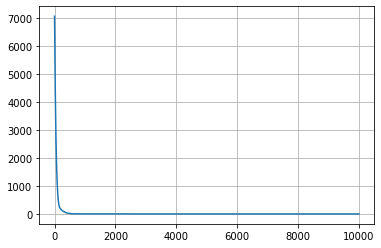

In [76]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense

list_a = []
n = 0
while n <= 100: # для начала напишем цикл генерации входных данных
    list_a.append([int(random.uniform(0, 11)), int(random.uniform(0, 24))])
    n += 1
list_b = []
for i in list_a: # и дополним его циклом с генерацией ожидаемых результатов
    list_b.append(i[0]//2 + i[1]*7)
print('Входные данные:', list_a)
print()
print('Ожидаемые результаты:', list_b)
print()
list_c = [[12, 31], [2, 5], [6, 4], [3, 3], [6, 1], [7, 9], [1, 1]] # создадим произвольные данные для проверки
a = np.array(list_a)
b = np.array(list_b)
с = np.array(list_c)
model = keras.Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='linear')) # немного изменим описание слоя
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.01)) #уменьшим шаг
history = model.fit(a, b, epochs=10000, verbose=0) #увеличим количество эпох

print("Обучение завершено")
print("Полученные предсказания: ", model.predict(list_c))
print("Рассчитанные веса: ", model.get_weights())

plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

Обучение завершено
Полученные предсказания:  [2.198864828761296e-22, 0.9999673366546631, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.1201869458309375e-05, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Округленные предсказания:  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Реальные значения: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
4/4 [==============================] - 0s 1ms/step - loss: 1.0582e-05 - accuracy: 1.0000
Рассчитанные веса:  [array([[ 3.2465298e+00, -1.1916885e+00,  4.5634894e+00],
       [ 3.2384918e+00, -5.9243762e-01,  6.8442016e+00],
       [-2.2341642e+00, -1.1478384e+00,  2.2930901e+00],
       [-5.6692133e+00, -3.1667256e-01,  2.2720954e+00],
       [-3.2885015e+00, -6.2536007e-01, -6.8651114e+00],
       [ 7.7535768e+00, -6.8812996e-01, -2.8601229e-02],
       [-7.8014054e+00, -5.0070173e-01, -1.7121255e-03]], dtype=float32), array([-3.19949

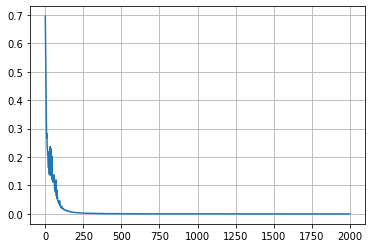

In [200]:
import numpy as np
import time
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import activations
from keras import backend as K
start_time = time.time()


def generate_data(): # генератор из прошлой части оставляем
    my_data = []
    n = 0
    while '{0:07b}'.format(n) != '{0:07b}'.format(128):
        my_data.append(list('{0:07b}'.format(n)))
        n += 1
    return my_data


def act(x):
    return 0 if x < 0.5 else 1


def go(my_list): #референс на лабу 1 (и 2)
    x = np.array(my_list)
    w11 = [0.5, 0.5, 0, 0,-0.5, 0, 0]
    w12 = [0, 0, 0, -0.2, 0, 0.7, -0.3]
    w13 = [0, 0.3, 0.4, 0.3, -0.5, 0, 0]
    weight1 = np.array([w11, w12, w13]) # матрица 3x7
    weight2 = np.array([0.5, -0.4, 0.5]) # вектор 1х3

    sum_hidden = np.dot(weight1, x) # вычисляем сумму на входах нейронов
    # скрытого слоя
    #print("Значения сумм на нейронах скрытого слоя: "+str(sum_hidden))
    out_hidden = np.array([act(x) for x in sum_hidden])
    #print("Значения на выходах нейронов скрытого слоя: "+str(out_hidden))
    sum_end = np.dot(weight2, out_hidden)
    y = act(sum_end)
    #print("Выходное значение НС: "+str(y))
    return y


data = generate_data()
inp_data = []
inp_results = []
for i in data: # тут придется переделать слегка
    local = []
    for j in i: #создадим цикл для формирования локального листа с интеджерами 
        local.append(int(j)) # так как наша функция возвращает лист листов строк
    inp_data.append(local) # а для использования данных в ф-ции нс необходимы интеджеры
    inp_results.append(go(local))
#print(inp_data)
#print()
#print(inp_results)
#print()

 # создадим произвольные данные для проверки
a = np.array(inp_data[:102]) # срезаем первые пять значений для проверки
b = np.array(inp_results[:102]) # аналогично
с = np.array(inp_data[102:]) # берем те самые пять значений
d = np.array(inp_results[102:]) # аналогично 
model = keras.Sequential()
model.add(Dense(units=3, input_shape=(7,), activation='relu')) # 7 входов на 3 нейрона
model.add(Dense(units=1, input_shape=(3,), activation= 'sigmoid')) # второй слой
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam(0.1)) 
history = model.fit(a, b, epochs=2000, verbose=0) #увеличим количество эпох


print("Обучение завершено")
final = []
final_rounded = []
for var in model.predict(с).tolist():
    final.append(var[0])
    final_rounded.append((var[0] + 0.5) // 1)
print("Полученные предсказания: ", final)
print("Округленные предсказания: ", final_rounded)
print("Реальные значения:", d)
model.evaluate(a,b)
print("Рассчитанные веса: ", model.get_weights())
print("--- %s seconds ---" % (time.time() - start_time))

plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import time
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import activations
from keras import backend as K
start_time = time.time()


def generate_data(): # генератор из прошлой части оставляем
    my_data = []
    n = 0
    while '{0:07b}'.format(n) != '{0:07b}'.format(128):
        my_data.append(list('{0:07b}'.format(n)))
        n += 1
    return my_data


def act(x):
    return 0 if x < 0.5 else 1


def go(my_list): #референс на лабу 1 (и 2)
    x = np.array(my_list)
    w11 = [0.5, 0.5, 0, 0,-0.5, 0, 0]
    w12 = [0, 0, 0, -0.2, 0, 0.7, -0.3]
    w13 = [0, 0.3, 0.4, 0.3, -0.5, 0, 0]
    weight1 = np.array([w11, w12, w13]) # матрица 3x7
    weight2 = np.array([0.5, -0.4, 0.5]) # вектор 1х3

    sum_hidden = np.dot(weight1, x) # вычисляем сумму на входах нейронов
    # скрытого слоя
    #print("Значения сумм на нейронах скрытого слоя: "+str(sum_hidden))
    out_hidden = np.array([act(x) for x in sum_hidden])
    #print("Значения на выходах нейронов скрытого слоя: "+str(out_hidden))
    sum_end = np.dot(weight2, out_hidden)
    y = act(sum_end)
    #print("Выходное значение НС: "+str(y))
    return y


data = generate_data()
inp_data = []
inp_results = []
for i in data: # тут придется переделать слегка
    local = []
    for j in i: #создадим цикл для формирования локального листа с интеджерами 
        local.append(int(j)) # так как наша функция возвращает лист листов строк
    inp_data.append(local) # а для использования данных в ф-ции нс необходимы интеджеры
    inp_results.append(go(local))


def custom_activation(x):
    return (K.relu(x, threshold = 0.499, max_value = 1))


 # создадим произвольные данные для проверки
a = np.array(inp_data[:102]) # срезаем первые пять значений для проверки
b = np.array(inp_results[:102]) # аналогично
с = np.array(inp_data[102:]) # берем те самые пять значений
d = np.array(inp_results[102:]) # аналогично 
num = 0
counter = 0
while num != 10:
    model = keras.Sequential()
    model.add(Dense(units=3, input_shape=(7,), activation='relu')) # 7 входов на 3 нейрона
    model.add(Dense(units=1, input_shape=(3,), activation='sigmoid')) # второй слой
    model.compile(loss='binary_crossentropy',  metrics=['accuracy'], optimizer=keras.optimizers.Adam(0.01)) 
    history = model.fit(a, b, epochs=2000, verbose=0) #увеличим количество эпох
    final = []
    print(model.evaluate(a, b))
    for var in model.predict(с).tolist():
        final.append(var[0])
    print(final)
    if final == inp_results[102:]:
        counter += 1
    num += 1
print(inp_results[102:])
print ('Кол-во точных совпадений: ', counter)